<a href="https://colab.research.google.com/github/UrvashiiThakur/practiceGit/blob/main/05AprilTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

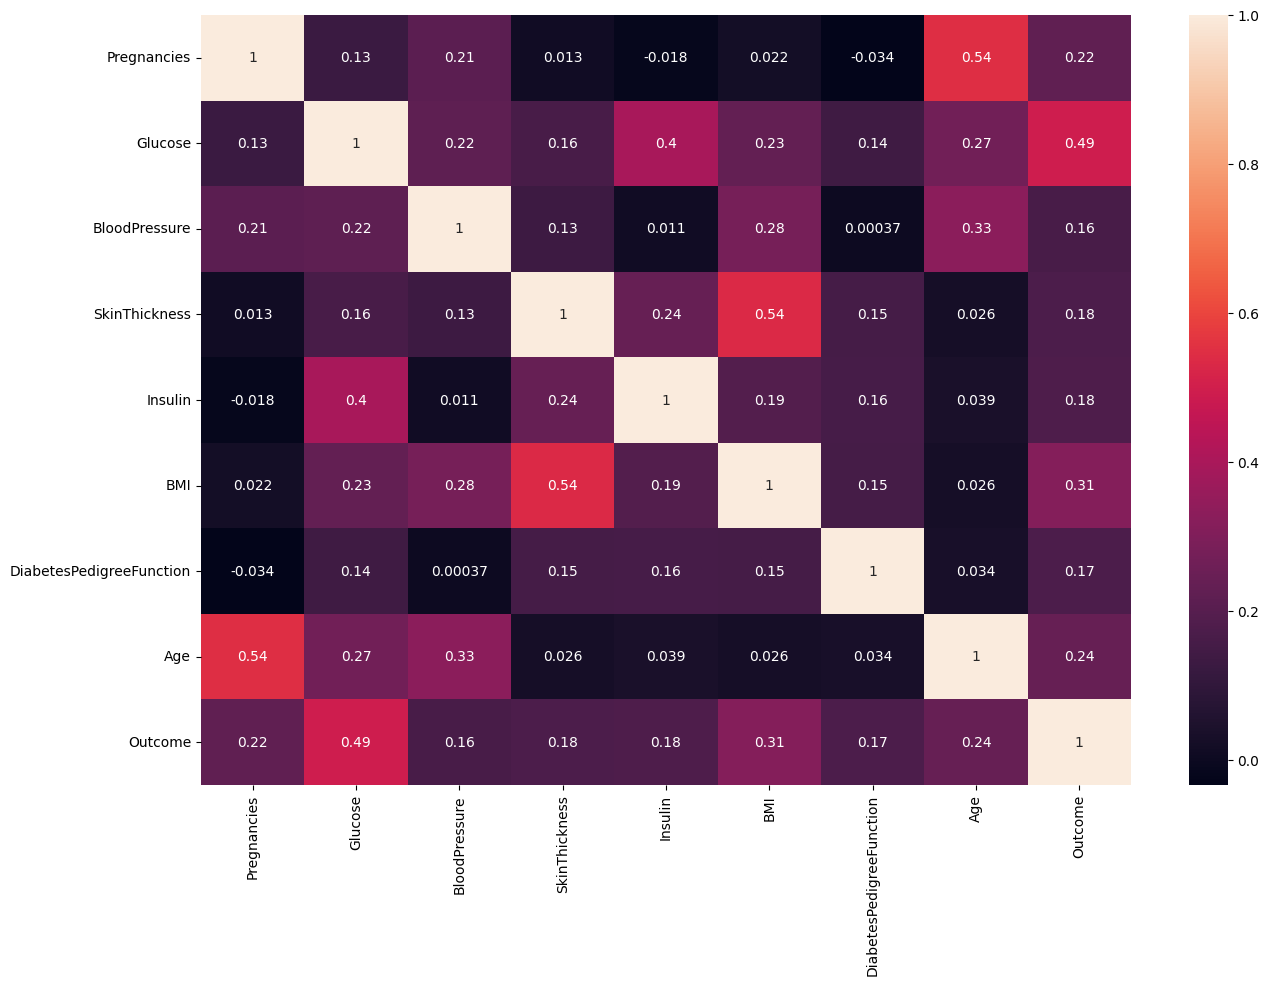

<Axes: >

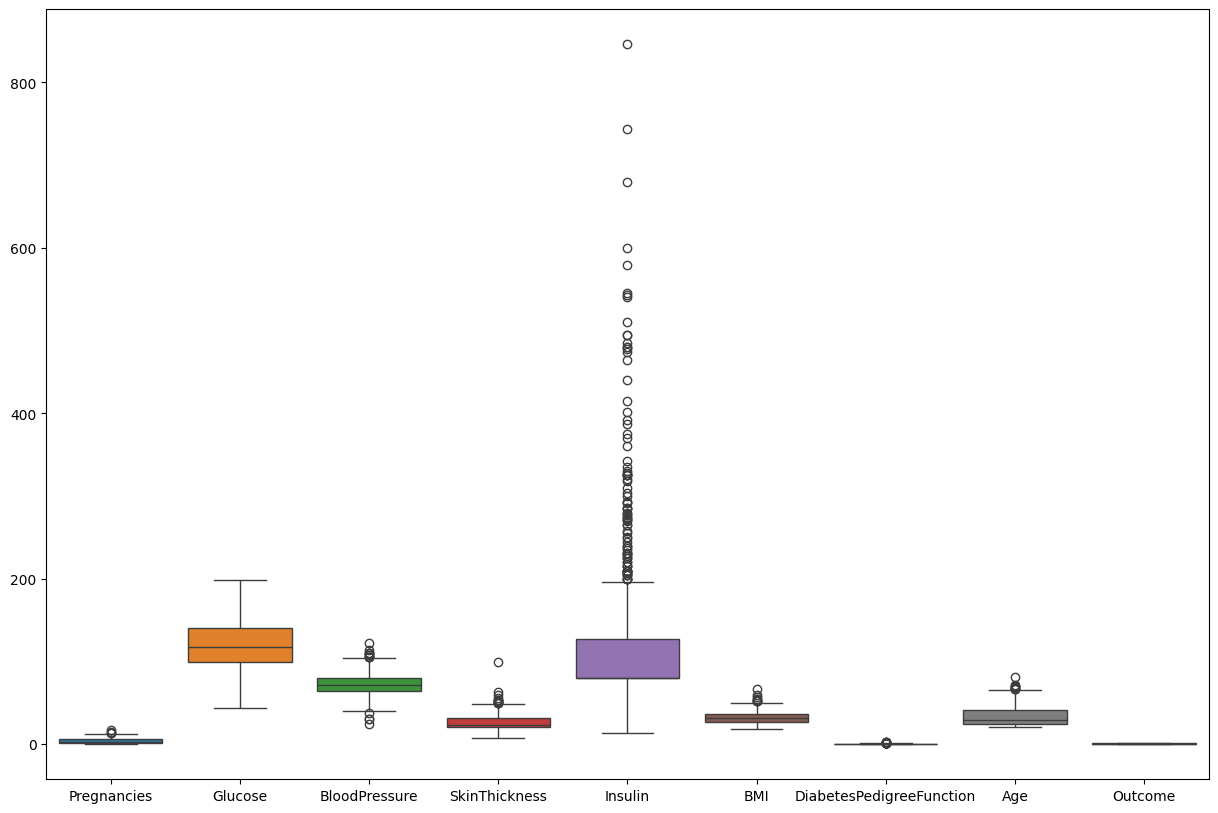

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()
plt.figure(figsize=(15,10))
sns.boxplot(df)

<Axes: xlabel='Insulin', ylabel='Density'>

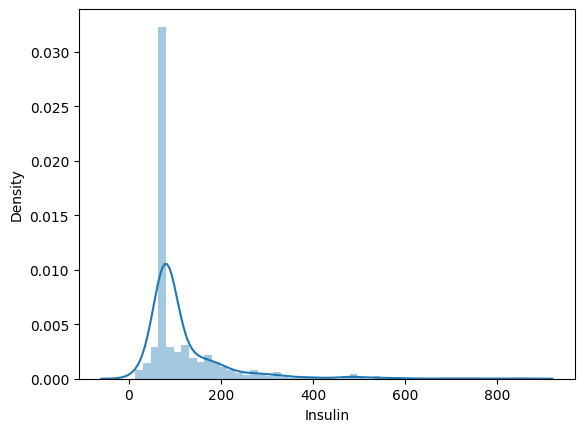

In [ ]:
sns.distplot(df['Insulin'])

In [ ]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dtc.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7272727272727273

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[76, 23],
       [19, 36]])

In [19]:
parameter ={
      'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['mse', 'friedman_mse']
}

In [20]:
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeRegressor()
clf = GridSearchCV(dtc,param_grid = parameter, cv = 5, scoring = 'accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='accuracy')

In [21]:
clf.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [22]:
y_pred = clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7337662337662337
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        99
           1       0.61      0.73      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



In [25]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0.])